<a href="https://colab.research.google.com/github/Nov05/DS-Unit-1-Sprint-5-Data-Storytelling-Blog-Post/blob/master/fdic_failed_bank_list.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# created by nov05 on 2019-06-24

**Failed Bank List (Since October 1, 2000)**  
The FDIC is often appointed as receiver for failed banks. This page contains useful information for the customers and vendors of these banks. This includes information on the acquiring bank (if applicable), how your accounts and loans are affected, and how vendors can file claims against the receivership.

**Bank Failures in Brief**  
Brief summary of each bank failure from 2001 to the present.

**Bank Failures and Assistance Data**  
A complete look at bank failures and assistance transactions of FDIC-insured institutions from 1934 to the present. The data is updated after a bank failure or assistance transaction.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

https://catalog.data.gov/dataset/fdic-failed-bank-list  
https://docs.python.org/3/howto/unicode.html#the-string-type  

In [0]:
# url="http://www.fdic.gov/bank/individual/failed/banklist_utf8.csv"
url = "https://drive.google.com/uc?id=16R-U0x0Cc3tt4UfzmtvTy3z7rjdW8AkJ"
df = pd.read_csv(url, encoding='8859') # seriously? 8859?

In [5]:
print(df.shape)
df.head()

(556, 7)


,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,The Enloe State Bank,Cooper,TX,10716,"Legend Bank, N. A.",31-May-19,18-Jun-19
1,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,15-Dec-17,1-Feb-19
2,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,13-Oct-17,21-Feb-18
3,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",26-May-17,29-Jan-19
4,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,5-May-17,22-Mar-18


In [6]:
# check NAs
df.isnull().sum()

Bank Name                0
City                     0
ST                       0
CERT                     0
Acquiring Institution    0
Closing Date             0
Updated Date             0
dtype: int64

In [7]:
# There are fifty states in the U.S.
cert_per_state = df.groupby('ST')['CERT'].nunique().reset_index()
cert_per_state.sort_values(by='CERT', ascending=False, inplace=True)
print(cert_per_state.shape)
cert_per_state.head()

(44, 2)


,ST,CERT
7,GA,93
6,FL,75
11,IL,69
3,CA,41
19,MN,23


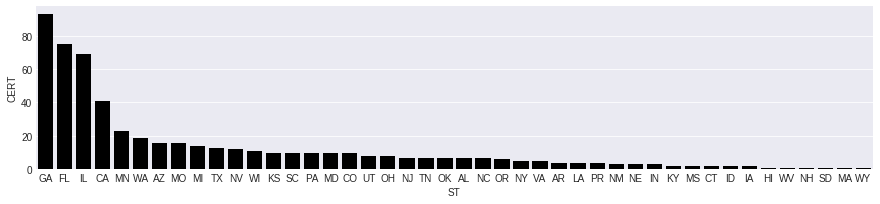

In [8]:
plt.style.use('seaborn-darkgrid')
fig, ax = plt.subplots(1,1, figsize=(15, 3))
sns.barplot(x='ST', y='CERT', data=cert_per_state,
            color='black'
           );

In [9]:
cert_per_acq = df.groupby('Acquiring Institution')['CERT'].nunique().reset_index()
cert_per_acq.sort_values(by='CERT', ascending=False, inplace=True)
print(cert_per_acq.shape)
cert_per_acq.head()

(291, 2)


,Acquiring Institution,CERT
171,No Acquirer,31
226,State Bank and Trust Company,12
112,First-Citizens Bank & Trust Company,11
9,Ameris Bank,10
266,U.S. Bank N.A.,9


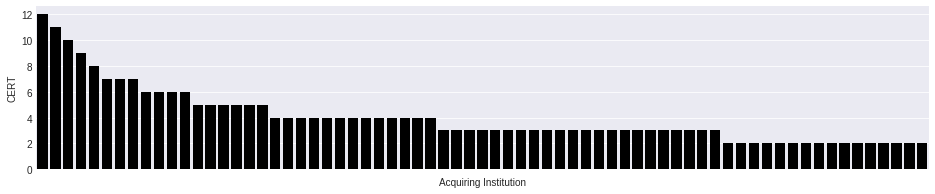

In [18]:
plt.style.use('seaborn-darkgrid')
fig, ax = plt.subplots(1,1, figsize=(16, 3))
g = sns.barplot(x='Acquiring Institution', y='CERT', 
               data=cert_per_acq[1:70],
               color='black'
               )
g.set(xticklabels=[]);

In [23]:
# convert datetime 31-May-19
df["closingdate"] = pd.to_datetime(df["Closing Date"], 
                                   format="%d-%b-%y")
df["updateddate"] = pd.to_datetime(df["Updated Date"], 
                                   format="%d-%b-%y")
df.sample(2)

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date,closingdate,updateddate
334,Statewide Bank,Covington,LA,29561,Home Bank,12-Mar-10,31-Jan-19,2010-03-12,2019-01-31
345,George Washington Savings Bank,Orland Park,IL,29952,"FirstMerit Bank, N.A.",19-Feb-10,31-Jan-19,2010-02-19,2019-01-31


In [25]:
# check date range
df.describe(exclude=np.number)

,Bank Name,City,ST,Acquiring Institution,Closing Date,Updated Date,closingdate,updateddate
count,556,556,556,556,556,556,556,556
unique,540,427,44,291,252,113,252,113
top,Horizon Bank,Chicago,GA,No Acquirer,30-Oct-09,29-Jan-19,2009-10-30 00:00:00,2019-01-29 00:00:00
freq,3,20,93,31,9,97,9,97
first,NaN,NaN,NaN,NaN,NaN,NaN,2000-10-13 00:00:00,2002-11-18 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-31 00:00:00,2019-06-19 00:00:00


In [53]:
df_days = (df['updateddate']-df['closingdate']).dt.days
print(type(df_days))
df_days[:6]

<class 'pandas.core.series.Series'>


0     18
1    413
2    131
3    613
4    321
5    641
dtype: int64

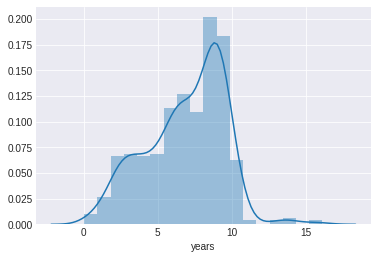

In [54]:
# how many years after the closing date the info would be upated
sns.distplot(df_days/365);
plt.xlabel('years');

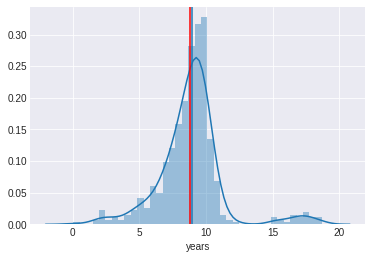

In [61]:
# how long the bank has been closed
df_days = (datetime.now()-df['closingdate']).dt.days
sns.distplot(df_days/365)
plt.xlabel('years');
plt.axvline((df_days/365).median());
plt.axvline((df_days/365).mean(), color='red');